In [1]:
# 指纹识别分类模型
# 数据来源博洛尼亚大学FVC指纹验证竞赛2004数据集 http://bias.csr.unibo.it/fvc2004/databases.asp
# 数据结构：来自DB1,DB2,DB3,DB4四个数据库分别代表不同设备采集的指纹：
#     DB1：CrossMatch 的光学传感器“V300”
#     DB2：Digital Persona 的光学传感器“U.are.U 4000”
#     DB3：Atmel 的热扫描传感器“FingerChip FCD4B14CB”
#     DB4：合成指纹生成
# 采用深度学习模型CNN 进行指纹采集设备的分类识别
# 样本总数为 4*80=320 训练测试集样本比8:2

In [2]:
from PIL import Image
import numpy as np
import glob
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils

In [3]:
def get_img(imgpath):
    img=Image.open(imgpath)
#     print('%s, %s, %s' % (img.mode, img.size, img.format))
    # img.show()
#     print(np.array(img))
    new_img = img.resize((50,50))
    print('%s, %s, %s' % (new_img.mode, new_img.size, new_img.format))
    print(np.array(new_img))
    return np.array(new_img)

In [4]:
def get_data():
    X_data,y_data = [],[]
    for i in range(4):
        print(i)
        for jpgfile in glob.glob("/Users/zhiyue/Downloads/DB"+str(i+1)+"_B/*.tif"):
            nimg = get_img(jpgfile)
            print(nimg)
            X_data.append(nimg)
            y_data.append(i)
    X_data =np.array(X_data)
    y_data =np.array(y_data)
    return X_data,y_data  

In [5]:
 X_data,y_data  =get_data()

0
L, (50, 50), None
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
L, (50, 50), None
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
L, (50, 50), None
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ..

L, (50, 50), None
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [214 170 176 ... 160 161 191]
 [200 169 170 ... 156 155 177]
 [188 175 175 ... 160 163 143]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [214 170 176 ... 160 161 191]
 [200 169 170 ... 156 155 177]
 [188 175 175 ... 160 163 143]]
L, (50, 50), None
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [217 178 185 ... 167 167 199]
 [205 176 177 ... 166 167 189]
 [194 179 182 ... 171 173 167]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [217 178 185 ... 167 167 199]
 [205 176 177 ... 166 167 189]
 [194 179 182 ... 171 173 167]]
L, (50, 50), None
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [215 173 181 ... 165 163 196]
 [203 173 175 ... 164 163 186]
 [193 176 178 ... 

L, (50, 50), None
[[110 110 110 ... 110 110 110]
 [110 110 110 ... 110 110 110]
 [110 110 110 ... 110 110 110]
 ...
 [110 110 110 ... 110 110 110]
 [110 110 110 ... 110 110 110]
 [110 110 110 ... 110 110 110]]
[[110 110 110 ... 110 110 110]
 [110 110 110 ... 110 110 110]
 [110 110 110 ... 110 110 110]
 ...
 [110 110 110 ... 110 110 110]
 [110 110 110 ... 110 110 110]
 [110 110 110 ... 110 110 110]]
L, (50, 50), None
[[111 111 111 ... 111 111 111]
 [111 111 111 ... 112 112 112]
 [111 111 113 ...  99  96  94]
 ...
 [106 106 105 ... 111 111 111]
 [111 111 111 ... 111 111 111]
 [111 111 111 ... 111 111 111]]
[[111 111 111 ... 111 111 111]
 [111 111 111 ... 112 112 112]
 [111 111 113 ...  99  96  94]
 ...
 [106 106 105 ... 111 111 111]
 [111 111 111 ... 111 111 111]
 [111 111 111 ... 111 111 111]]
L, (50, 50), None
[[112 112 112 ... 112 112 112]
 [112 112 112 ... 112 112 112]
 [112 112 113 ... 113 113 112]
 ...
 [112 112 112 ... 113 113 112]
 [112 112 112 ... 112 112 112]
 [112 112 112 ... 

L, (50, 50), None
[[127 112 112 ... 114 117 116]
 [129 117 124 ... 119 119 122]
 [133 129 132 ... 131 125 123]
 ...
 [151 146 150 ... 127 126 126]
 [149 142 146 ... 127 125 124]
 [152 144 149 ... 128 125 128]]
[[127 112 112 ... 114 117 116]
 [129 117 124 ... 119 119 122]
 [133 129 132 ... 131 125 123]
 ...
 [151 146 150 ... 127 126 126]
 [149 142 146 ... 127 125 124]
 [152 144 149 ... 128 125 128]]
L, (50, 50), None
[[ 79  71  78 ...  71  64  62]
 [ 88  80  85 ...  79  74  71]
 [100  89  91 ...  87  84  80]
 ...
 [163 160 165 ... 144 141 137]
 [155 154 160 ... 140 133 129]
 [155 152 159 ... 134 129 125]]
[[ 79  71  78 ...  71  64  62]
 [ 88  80  85 ...  79  74  71]
 [100  89  91 ...  87  84  80]
 ...
 [163 160 165 ... 144 141 137]
 [155 154 160 ... 140 133 129]
 [155 152 159 ... 134 129 125]]
L, (50, 50), None
[[103  93  97 ...  93  91  90]
 [109 100 106 ... 102  98  97]
 [117 110 113 ... 111 108 104]
 ...
 [157 154 158 ... 131 137 136]
 [152 148 153 ... 131 133 132]
 [153 148 155 ... 

In [6]:
len(X_data),len(y_data)

(320, 320)

In [7]:
X_data[241].shape

(50, 50)

In [8]:
X_data[61]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [9]:
y_data

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [10]:
class_names = ['CrossMatch的光学传感器','DigitalPersona的光学传感器','Atmel的热扫描传感器','合成指纹生成']

In [11]:
train_X, test_X, train_y, test_y = train_test_split(X_data, y_data, test_size=0.2)

In [12]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((256, 50, 50), (64, 50, 50), (256,), (64,))

In [13]:
train_X[2]

array([[112, 112, 112, ..., 112, 112, 112],
       [112, 112, 112, ..., 112, 112, 112],
       [112, 112, 112, ..., 112, 112, 112],
       ...,
       [112, 112, 112, ..., 112, 112, 112],
       [112, 112, 112, ..., 112, 112, 112],
       [112, 112, 112, ..., 112, 112, 112]], dtype=uint8)

In [14]:
train_y

array([3, 2, 2, 3, 0, 3, 1, 2, 2, 0, 1, 0, 0, 2, 1, 3, 3, 3, 0, 3, 0, 1,
       2, 3, 2, 2, 1, 0, 3, 1, 3, 2, 3, 0, 0, 1, 1, 0, 1, 2, 0, 0, 1, 2,
       0, 1, 2, 2, 1, 2, 2, 1, 3, 2, 2, 1, 1, 3, 2, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 3, 3, 3, 3, 1, 0, 1, 0, 0, 3, 2, 0, 1, 1, 1, 1, 0, 1, 2,
       0, 1, 1, 2, 1, 0, 2, 1, 2, 3, 1, 2, 0, 0, 2, 1, 2, 3, 2, 1, 1, 3,
       2, 3, 3, 0, 3, 3, 3, 2, 3, 1, 1, 2, 2, 0, 3, 3, 3, 2, 0, 2, 2, 3,
       2, 1, 1, 0, 3, 3, 0, 0, 0, 2, 1, 0, 0, 3, 2, 1, 2, 3, 1, 1, 1, 1,
       3, 1, 2, 0, 1, 1, 0, 3, 0, 3, 2, 0, 3, 3, 2, 2, 1, 0, 2, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 1, 2, 0, 2, 3, 2, 1, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 0, 1, 0, 0, 2, 1, 1, 3, 0, 3, 2, 3, 0, 0, 2, 1, 3, 3, 0, 3, 0,
       2, 3, 3, 0, 1, 1, 3, 0, 2, 2, 2, 3, 3, 2, 1, 0, 1, 3, 2, 2, 0, 3,
       0, 2, 3, 0, 1, 2, 3, 2, 2, 1, 3, 0, 0, 2])

In [15]:
# from libtiff import TIFF
# tif = TIFF.open('/Users/zhiyue/Downloads/DB2_B/109_7.tif', mode='r')
# img = tif.read_image()  
# print(img) #打印出图片像素值的array
# print(img.shape) #形状257x257
# print(img[1,1]) #获取坐标[1,1]处的像素值

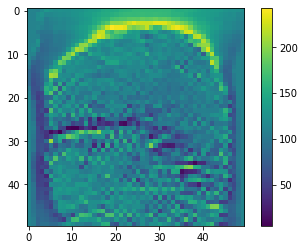

In [16]:
plt.figure()
plt.imshow(train_X[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_X = train_X/255.0
test_X = test_X/255.0

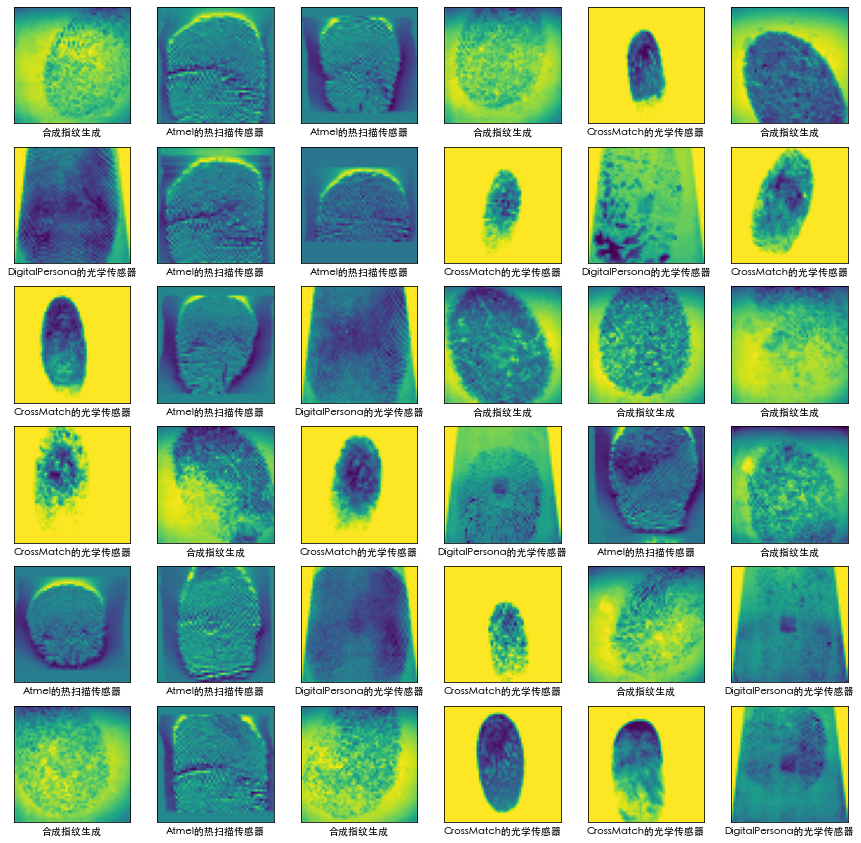

In [18]:
plt.figure(figsize=(15,15))
for i in range(36):
    matplotlib.rc("font", family='Heiti TC')
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_X[i]) #原色
    #plt.imshow(train_images[i],cmap=plt.cm.binary) #黑白色
    plt.xlabel(class_names[train_y[i]])
plt.show()

In [19]:
train_X[2]

array([[0.43921569, 0.43921569, 0.43921569, ..., 0.43921569, 0.43921569,
        0.43921569],
       [0.43921569, 0.43921569, 0.43921569, ..., 0.43921569, 0.43921569,
        0.43921569],
       [0.43921569, 0.43921569, 0.43921569, ..., 0.43921569, 0.43921569,
        0.43921569],
       ...,
       [0.43921569, 0.43921569, 0.43921569, ..., 0.43921569, 0.43921569,
        0.43921569],
       [0.43921569, 0.43921569, 0.43921569, ..., 0.43921569, 0.43921569,
        0.43921569],
       [0.43921569, 0.43921569, 0.43921569, ..., 0.43921569, 0.43921569,
        0.43921569]])

In [20]:
train_X.shape[0]

256

In [21]:
train_X = train_X.reshape(train_X.shape[0],50,50,1)
test_X = test_X.reshape(test_X.shape[0],50,50,1)
# train_y = utils.to_categorical(train_y,num_classes=4)
# test_y = utils.to_categorical(test_y,num_classes=4)

In [22]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((256, 50, 50, 1), (64, 50, 50, 1), (256,), (64,))

In [23]:
train_X[0]

array([[[0.43529412],
        [0.38039216],
        [0.39215686],
        ...,
        [0.39215686],
        [0.38823529],
        [0.38431373]],

       [[0.45098039],
        [0.40784314],
        [0.43137255],
        ...,
        [0.41960784],
        [0.40784314],
        [0.41176471]],

       [[0.47058824],
        [0.44705882],
        [0.4627451 ],
        ...,
        [0.43921569],
        [0.43529412],
        [0.42745098]],

       ...,

       [[0.58039216],
        [0.56862745],
        [0.58823529],
        ...,
        [0.55294118],
        [0.52156863],
        [0.50196078]],

       [[0.56862745],
        [0.54117647],
        [0.56078431],
        ...,
        [0.50980392],
        [0.49411765],
        [0.49019608]],

       [[0.57647059],
        [0.55294118],
        [0.57254902],
        ...,
        [0.50588235],
        [0.49411765],
        [0.49803922]]])

In [24]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(4)
])
model.summary()
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])
history = model.fit(train_X,train_y,epochs=10,
                   validation_data=(test_X, test_y))

2022-05-05 16:24:05.980593: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-05 16:24:05.981800: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 5184)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

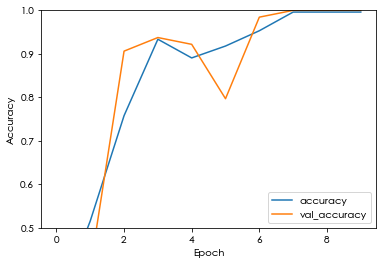

64/1 - 0s - loss: 0.0360 - accuracy: 1.0000


In [25]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)

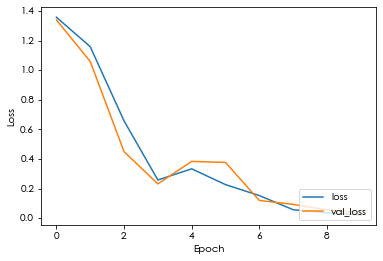

64/1 - 0s - loss: 0.0360 - accuracy: 1.0000


In [26]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim()
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)

In [27]:
test_loss

0.03556891717016697

In [28]:
test_acc

1.0

In [29]:
pred_y=model.predict(test_X)

In [30]:
pred_y

array([[ -2.6446986 ,   1.5158904 ,  -0.35271245,   6.5436234 ],
       [  7.218689  ,   0.84240955,  -9.499997  ,   4.2393823 ],
       [ -5.5534925 ,  -0.98584294,   9.923092  ,   3.4065688 ],
       [ 12.761342  ,  -1.9120213 , -12.027253  ,   3.5355353 ],
       [  1.2056187 ,  -0.4580526 ,  -2.0925572 ,   6.5766335 ],
       [ -3.4916523 ,   4.0646358 ,  -1.8354142 ,   5.3551655 ],
       [ -6.85839   ,  -0.9397277 ,  11.828393  ,   3.9422011 ],
       [ 15.108411  ,  -5.531022  , -10.511104  ,   3.469816  ],
       [ -6.8715267 ,  -2.1980019 ,  13.235657  ,   3.5344052 ],
       [ 12.946653  ,  -3.8849902 ,  -9.880364  ,   3.5739517 ],
       [ 13.229616  ,  -3.101401  , -11.412333  ,   3.9627407 ],
       [ 11.584921  ,  -4.562148  ,  -8.176911  ,   4.7618628 ],
       [ -2.2793748 ,   2.0543432 ,  -1.2339834 ,   6.8548145 ],
       [ -2.7592661 ,   7.4628735 ,  -5.7077694 ,   3.7351851 ],
       [ -6.526637  ,   4.9098687 ,   2.2238386 ,   5.7005243 ],
       [ -1.994656  ,   2

In [31]:
class_names[np.argmax(pred_y[0])]

'合成指纹生成'

In [32]:
class_names[test_y[0]]

'合成指纹生成'